# ML Model to predict the AWS Product

### Import the necessary libraries

In [1]:
import string
import re
import nltk
import pandas as pd
import csv

from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('names')
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

### (A) Read the CSV file

In [3]:
df = pd.read_csv('C:\\Users\\Aruna\\Documents\\ACMS-IID\\data\\cleandata.csv')
df['description'] = df['description'].apply(lambda x: " ".join(x for x in str(x).split()))
df.head(10)

,id,label,description
0,1737.0,Amazon SNS,sms failure delivery retrieval detailed sms log using service sms notification event failed sms get acknowledgment containing detailed log object ...
1,1736.0,Amazon SNS,messages coming multiple accounts single sms short code use simple notification service send transactional sms messages clients requested notifica...
2,1735.0,Amazon SNS,android fcm support unity plugin unity plug-in build android due use depricated gcm api awsunitygcmwrapper ever going update plug-in builds fcm an...
3,1734.0,Amazon SNS,otp message delivery issue facing issue otp message delivery production environment mix behavior 1. message getting delivered 2. message delivered...
4,1733.0,Amazon SNS,simulating message persistence using sqs evaluating messaging requirements integrate multiple applications single producer publishes messages mult...
5,1732.0,Amazon SNS,sms messages delivered trying send sms messages via quite messages sent number delivered enabled cloudwatch logging shows correct entries provider...
6,1731.0,Amazon SNS,sms delivery fails phone currently unreachable/unavailable started observing behaviour today used work last week sms deliveries including messages...
7,1730.0,Amazon SNS,budget alert message sample implementing receive message budget alert created billing panel find place web sample message looks like chance one me...
8,1730.0,Amazon SNS,page configure test event option select event teplate look topic notification create entire test message json format looks like records eventsourc...
9,1729.0,Amazon SNS,mobile push endpoints use default content instead apns recently diving mobile push api registered many ios clients correct topics node.js server s...


#### Check the spread of tags in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464373 entries, 0 to 464372
Data columns (total 3 columns):
id             464371 non-null float64
label          464373 non-null object
description    464373 non-null object
dtypes: float64(1), object(2)
memory usage: 10.6+ MB


In [5]:
df['label'].describe()

count         464373
unique             8
top       Amazon EC2
freq          295113
Name: label, dtype: object

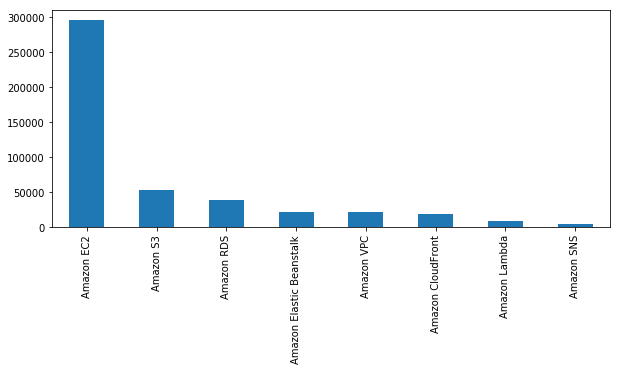

In [6]:
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

#### Check out one sample post

In [7]:
df['description'][0]

"sms failure delivery retrieval detailed sms log using service sms notification event failed sms get acknowledgment containing detailed log object atleast providerresponse fix sms failure delivery failure reasons occurred delivery ttl expired quota left account unknown error attempting reach phone error log available console notification messageid exxxx8ad-4bc5-5fe4-ae28-cdf8xxxx timestamp 2019-05-15 11:07:46.913 delivery phonecarrier bharti airtel maharashtra mnc 90 destination +9189xxxxxxxx priceinusd 0.00223 smstype transactional mcc 404 providerresponse delivery ttl expired dwelltimems 114 dwelltimemsuntildeviceack 5472 status failure present get based code snippet response service messageid d5212bf1-9183-5da4-826e-7e96a48xxxxx data.providerresponse undefined delivery undefined json.stringify responsemetadata requestid 5d9bxxx9-319d-52b4-8979-xxxxxxxx messageid d521xxxxf1-91xx-5da4-826e-xxxxxxxx code snippet exports.sendsms function msg phonenumber phonenumber +91 phonenumber setme

#### Top 30 words + frequency of each:

In [8]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:30]
freq

instance     397121
http         162376
using        104233
server        97012
instances     95161
new           88174
error         87124
get           83666
use           79977
one           76201
ip            73896
issue         73486
ms            72860
running       70945
see           69245
file          69201
like          66294
time          64526
problem       64398
need          63583
ami           59495
help          59452
access        58326
also          58101
volume        56532
data          54349
able          50244
still         49117
ebs           45135
set           44383
dtype: int64

In [9]:
print("There are totally", df['description'].apply(lambda x: len(x.split(' '))).sum(), "words before cleaning.")

There are totally 20397938 words before cleaning.


### (B) Text Pre-processing

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,:;.]')

BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

STOPWORDS = stopwords.words('english')

my_stop_words = ["hi", "hello", "regards", "thank", "thanks", "regard", "best", "wishes", "hey", "my", "do", "did",
                 "does", "had", "have", "has", "could", "can", "as", "is", "shall", "should", "would", "will", "you",
                 "me", "please", "know", "who", "we", "was", "were", "they"]

name = names.words()
STOPWORDS.extend(my_stop_words)
STOPWORDS.extend(name)

In [ ]:
def cleantext(text):
    
    # step 1 convert the text to lowercase
    text = text.lower()
    
    # step 2 remove all the html tags
    text = BeautifulSoup(text, "lxml").text
    
    # step 3 replace unwanted symbols by space
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    
    # step 4 remove some symbols
    text = BAD_SYMBOLS_RE.sub('', text)
    
    #step 5 remove the stop words
    text = " ".join(x for x in text.split() if x not in STOPWORDS and len(x) > 1)
    
    return text

In [ ]:
df['post'] = df['post'].apply(cleantext)


df['post'].head(20)

#### Top 30 words + frequency of occurence:

In [ ]:
freq = pd.Series(' '.join(df['post']).split()).value_counts()[:30]
freq

In [ ]:
print("There are totally", df['post'].apply(lambda x: len(x.split(' '))).sum(), "words after cleaning.")

### (C) Feature Engineering & Model Deployment

In [10]:
from sklearn.model_selection import train_test_split

X = df['description']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Naive Bayes Classifier for Multinomial Models

In [12]:
nb = Pipeline([('vect', TfidfVectorizer()), ('clf', MultinomialNB())])

nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [13]:
predictions = nb.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

[[   92  5375     0     0     0   308     0     0]
 [    1 88551     3     0     9    29     0     1]
 [    0  6514   113     0     5     5     0     0]
 [    0  2673     1     5     1    35     0     0]
 [    0 11064     0     0   691     0     0     0]
 [    1 13464     0     0     0  2542     0     0]
 [    0  1420     0     0     0     5     1     0]
 [    0  6372     0     0     0     2     0    29]]
                          precision    recall  f1-score   support

       Amazon CloudFront       0.98      0.02      0.03      5775
              Amazon EC2       0.65      1.00      0.79     88594
Amazon Elastic Beanstalk       0.97      0.02      0.03      6637
           Amazon Lambda       1.00      0.00      0.00      2715
              Amazon RDS       0.98      0.06      0.11     11755
               Amazon S3       0.87      0.16      0.27     16007
              Amazon SNS       1.00      0.00      0.00      1426
              Amazon VPC       0.97      0.00      0.01      6

## LogisticRegression Model

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', TfidfVectorizer()), ('clf', LogisticRegression(n_jobs = 1))])

logreg.fit(X_train, y_train)

C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False))])

In [15]:
predictions = logreg.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

[[ 3263  1625    11    24    50   797     0     5]
 [  126 85695   411    54   680   981    35   612]
 [   19  2467  3843    22   114   129     9    34]
 [   36   860    67  1491    47   161    21    32]
 [    6  3917    47    19  7571   100    10    85]
 [  304  4455    44    51    77 11051    10    15]
 [    5   456    12    18    17    70   847     1]
 [    3  2820    28     9    81    40     3  3419]]
                          precision    recall  f1-score   support

       Amazon CloudFront       0.87      0.57      0.68      5775
              Amazon EC2       0.84      0.97      0.90     88594
Amazon Elastic Beanstalk       0.86      0.58      0.69      6637
           Amazon Lambda       0.88      0.55      0.68      2715
              Amazon RDS       0.88      0.64      0.74     11755
               Amazon S3       0.83      0.69      0.75     16007
              Amazon SNS       0.91      0.59      0.72      1426
              Amazon VPC       0.81      0.53      0.64      6

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([('vect', TfidfVectorizer()), ('clf', RandomForestClassifier())])

rf.fit(X_train, y_train)

C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
predictions = rf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

## Linear SVC Model

In [16]:
from sklearn.svm import LinearSVC

svm = Pipeline([('vect', TfidfVectorizer()), ('clf', LinearSVC())])

svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [17]:
predictions = svm.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.85      0.61      0.71      5775
              Amazon EC2       0.86      0.96      0.91     88594
Amazon Elastic Beanstalk       0.85      0.63      0.72      6637
           Amazon Lambda       0.86      0.63      0.73      2715
              Amazon RDS       0.87      0.70      0.77     11755
               Amazon S3       0.82      0.71      0.76     16007
              Amazon SNS       0.88      0.66      0.75      1426
              Amazon VPC       0.81      0.56      0.66      6403

               micro avg       0.85      0.85      0.85    139312
               macro avg       0.85      0.68      0.75    139312
            weighted avg       0.85      0.85      0.85    139312

accuracy: 0.8518577007005858


## XGBoost Model

In [20]:
from xgboost import XGBClassifier

xgb = Pipeline([('vect', TfidfVectorizer()), ('clf', XGBClassifier())])
xgb.fit(X_train, y_train)

%time

Wall time: 0 ns


In [21]:
predictions = xgb.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

[[ 2628  2565     5    20     4   542     0    11]
 [   93 86306   346    53   696   534    14   552]
 [   10  3393  3021     7    98    71     2    35]
 [   43  1264    30  1221    22    93    15    27]
 [    3  5980    62    35  5559    40     6    70]
 [  232  7715    24    67    55  7889     3    22]
 [    1   746     5    18     2    17   636     1]
 [    2  3333    28     6    47    13     0  2974]]
                          precision    recall  f1-score   support

       Amazon CloudFront       0.87      0.46      0.60      5775
              Amazon EC2       0.78      0.97      0.86     88594
Amazon Elastic Beanstalk       0.86      0.46      0.59      6637
           Amazon Lambda       0.86      0.45      0.59      2715
              Amazon RDS       0.86      0.47      0.61     11755
               Amazon S3       0.86      0.49      0.63     16007
              Amazon SNS       0.94      0.45      0.61      1426
              Amazon VPC       0.81      0.46      0.59      6